<a href="https://colab.research.google.com/github/xyvlin/machine_learning_hw/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import pandas as pd

In [ ]:
x = np.array([-3, -2, -1, 0, 1, 2, 3])
y = np.array([1, 1, -1, -1, -1, 1, 1])
phi = np.column_stack((x, x**2))
data_table = pd.DataFrame(phi, columns=['x', 'x^2'])
data_table['y'] = y
data_table

,x,x^2,y
0,-3,9,1
1,-2,4,1
2,-1,1,-1
3,0,0,-1
4,1,1,-1
5,2,4,1
6,3,9,1


In [ ]:
svm = SVC(kernel='linear',C=1.0,random_state=1)
svm.fit(phi, y)

w = svm.coef_[0]
w0 = svm.intercept_[0]
print(f"w1 = {w[0]}\nw2 = {w[1]}\nw0 = {w0}")

w1 = 0.00016000000000021553
w2 = 0.6666133333333335
w0 = -1.6665600000000005


#Q1#
For decision boundary line (*db*):

$w_1x+w_2x^2+w_0=0$

$w_2x^2=-(w_1x+w_0)$

$x^2=\frac{-(w_1x+w_0)}{w_2}$

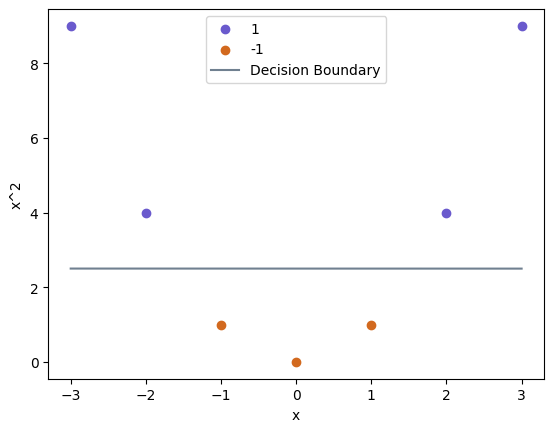

In [ ]:
plt.scatter(x[y == 1], phi[y == 1, 1], color='slateblue', label="1")
plt.scatter(x[y == -1], phi[y == -1, 1], color='chocolate', label="-1")
db_x = np.linspace(x[0],x[-1],100)
db_y = -(w[0]*db_x+w0)/w[1]
plt.plot(db_x,db_y,color='slategray',label="Decision Boundary")
plt.xlabel("x")
plt.ylabel("x^2")
plt.legend()

#Q2#
Margin $=\frac{2}{\|w\|}$

In [ ]:
margin = 2/np.linalg.norm(w)
print("margin:",margin)

margin: 3.0002399327807994


#Q3#
$x^2\rightarrow y$

$y=\frac{-(w_1x+w_0)}{w_2}$

slope: $-\frac{w_1}{w_2}$

orthogonal vector's slope: $\frac{w_2}{w_1}$

orthogonal vector: $(w_1,w_2)$

#Q4#
$h(\phi(x))=w^T\phi(x_i)+w_0=w_1x+w_2x^2+w_0$

Decision boundary is where $h(\phi(x))=0$ so it is $w_1x+w_2x^2+w_0=0$.

This equation can be multipled by any constant c and still be true, so all possible $(w,w_0)$ is $(cw_1,cw_2,cw_0),c>0$

#Q5#
$w=(0.00016000000000021553, 0.6666133333333335)\approx(0,0.667)$

#Q6#
$y_i(w_1x+w_2x^2+w_0)\geq1$

Using points $(-2,1),(-1,-1),(2,1)$, we get
$$1(w_1(-2)+w_2(-2)^2+w_0=1$$
$$-1(w_1(-1)+w_2(-1)^2+w_0=1$$
$$1(w_1(2)+w_2(2)^2+w_0=1$$
-
$$-2w_1+4w_2+w_0=1$$
$$-2w_1+2w_2+2w_0=-2$$
$$2w_1+4w_2+w_0=1$$
-
$$8w_2+2w_0=2$$
$$2w_2-w_0=3$$
-
$$8w_2+2w_0=2$$
$$8w_2-4w_0=12$$
-
$$6w_0=-10$$
$$w_0=-10/6\approx-1.667$$

The discriminant funciton is $h(\phi(x))=0.667x^2-1.667$

#Q7#
Support vectors: $(-2,1),(-1,-1),(1,-1),(2,1)$

In [ ]:
w2=0.667
w0=-1.667
sx=np.array([-2,-1,1,2])
sy=np.array([1,-1,-1,1])
for i in range(4):
  print(f"({sx[i]},{sy[i]})",sy[i]*(w2*sx[i]**2+w0),">= 1 (follows constraint)" if sy[i]*(w2*sx[i]**2+w0)>=1 else "<1")

(-2,1) 1.0010000000000001 >= 1 (follows constraint)
(-1,-1) 1.0 >= 1 (follows constraint)
(1,-1) 1.0 >= 1 (follows constraint)
(2,1) 1.0010000000000001 >= 1 (follows constraint)
